In [6]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [7]:
matrix_cmp_21 = pd.read_csv("../data/cmp_sourmash/thaps_k21.cmp.csv")
matrix_cmp_31 = pd.read_csv("../data/cmp_sourmash/thaps_k31.cmp.csv")
matrix_cmp_51 = pd.read_csv("../data/cmp_sourmash/thaps_k51.cmp.csv")

In [8]:
print(len(matrix_cmp_21.columns))
print(len(matrix_cmp_31.columns))
print(len(matrix_cmp_51.columns))
matrix_cmp_21

9
9
9


,data/trimmed_output/SRR1202305.fastq,data/trimmed_output/SRR1202307.fastq,data/trimmed_output/SRR1202309.fastq,data/trimmed_output/SRR1202311.fastq,data/trimmed_output/SRR1202313.fastq,data/trimmed_output/SRR1202315.fastq,data/trimmed_output/SRR4068200.fastq,data/trimmed_output/SRR4068201.fastq,data/trimmed_output/SRR4068202.fastq
0,1.000000,0.828735,0.819678,0.016036,0.167062,0.114537,0.424976,0.286066,0.290252
1,0.828735,1.000000,0.821817,0.023559,0.188384,0.157082,0.462314,0.282843,0.308701
2,0.819678,0.821817,1.000000,0.010225,0.072578,0.060307,0.354806,0.182314,0.215858
3,0.016036,0.023559,0.010225,1.000000,0.063169,0.080495,0.061089,0.068251,0.066128
4,0.167062,0.188384,0.072578,0.063169,1.000000,0.500855,0.523124,0.587574,0.492083
5,0.114537,0.157082,0.060307,0.080495,0.500855,1.000000,0.463322,0.542702,0.521576
6,0.424976,0.462314,0.354806,0.061089,0.523124,0.463322,1.000000,0.569341,0.520660
7,0.286066,0.282843,0.182314,0.068251,0.587574,0.542702,0.569341,1.000000,0.595718
8,0.290252,0.308701,0.215858,0.066128,0.492083,0.521576,0.520660,0.595718,1.000000


In [9]:
newnames_51 = []
newnames_21 = []
newnames_31 = []
for r in range(len(matrix_cmp_51.columns)):
    curr = matrix_cmp_51.columns[r].split("/")
    curr = curr[len(curr)-1].split("_")[0]
    newnames_51.append(curr)
    
    
for r in range(len(matrix_cmp_31.columns)):
    curr = matrix_cmp_31.columns[r].split("/")
    curr = curr[len(curr)-1].split("_")[0]
    newnames_31.append(curr)
    
    
for r in range(len(matrix_cmp_21.columns)):
    curr = matrix_cmp_21.columns[r].split("/")
    curr = curr[len(curr)-1].split("_")[0]
    newnames_21.append(curr)

matrix_cmp_21.columns = newnames_21
matrix_cmp_31.columns = newnames_31
matrix_cmp_51.columns = newnames_51
matrix_cmp_31

,SRR1202305.fastq,SRR1202307.fastq,SRR1202309.fastq,SRR1202311.fastq,SRR1202313.fastq,SRR1202315.fastq,SRR4068200.fastq,SRR4068201.fastq,SRR4068202.fastq
0,1.000000,0.766906,0.610157,0.631274,0.790322,0.777651,0.720216,0.690226,0.619771
1,0.766906,1.000000,0.720799,0.625223,0.811297,0.747124,0.742382,0.770006,0.667769
2,0.610157,0.720799,1.000000,0.516246,0.631670,0.602512,0.660780,0.761261,0.621617
3,0.631274,0.625223,0.516246,1.000000,0.637390,0.618456,0.577826,0.572906,0.520081
4,0.790322,0.811297,0.631670,0.637390,1.000000,0.831232,0.717612,0.709506,0.621782
5,0.777651,0.747124,0.602512,0.618456,0.831232,1.000000,0.704359,0.698157,0.599342
6,0.720216,0.742382,0.660780,0.577826,0.717612,0.704359,1.000000,0.743462,0.689807
7,0.690226,0.770006,0.761261,0.572906,0.709506,0.698157,0.743462,1.000000,0.683954
8,0.619771,0.667769,0.621617,0.520081,0.621782,0.599342,0.689807,0.683954,1.000000


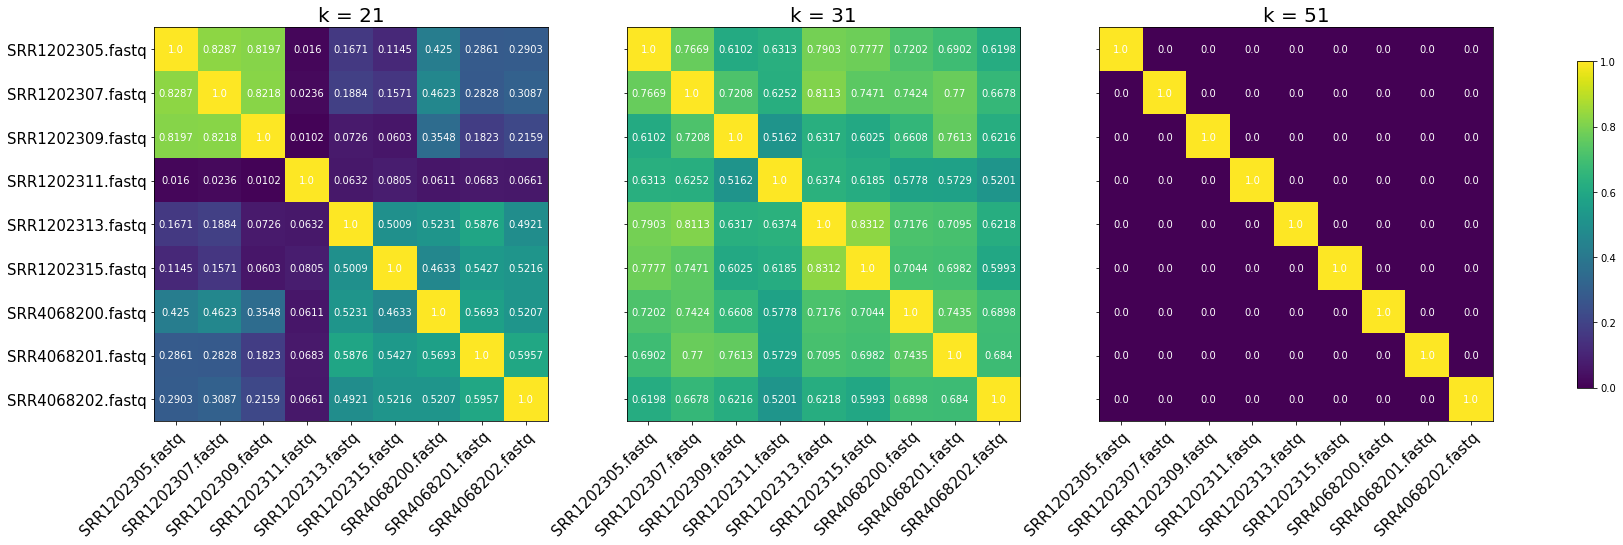

In [10]:
fig, axs = plt.subplots(1, 3, sharey= True, figsize=(30,10))
ax1 = axs[0]
im = ax1.imshow(matrix_cmp_21)
im.set_clim(0,1)
ax1.set_title('k = 21',size=20)
for i in range(len(matrix_cmp_21.index)):
    for j in range(len(matrix_cmp_21.columns)):
        text = ax1.text(j, i, round(matrix_cmp_21.iloc[i, j],4),
                       ha="center", va="center", color="w")
        
        
ax2 = axs[1]
ax3 = axs[2]
ax2.set_title('k = 31',size=20)        
im = ax2.imshow(matrix_cmp_31)
im.set_clim(0,1)
for i in range(len(matrix_cmp_31.index)):
    for j in range(len(matrix_cmp_31.columns)):
        text = ax2.text(j, i, round(matrix_cmp_31.iloc[i, j],4),
                       ha="center", va="center", color="w")
labels = list(matrix_cmp_21.columns)
ax1.set_xticks(np.arange(len(labels)))
ax1.set_yticks(np.arange(len(labels)))
ax2.set_xticks(np.arange(len(labels)))
ax3.set_xticks(np.arange(len(labels)))

ax1.set_yticklabels(labels)
ax1.set_xticklabels(labels)
ax2.set_xticklabels(labels)
ax3.set_xticklabels(list(matrix_cmp_21.columns))

# Rotate the tick labels and set their alignment.
plt.setp(ax2.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.setp(ax1.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.setp(ax3.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
ax1.tick_params(labelsize=15)
ax2.tick_params(labelsize=15)
ax3.tick_params(labelsize=15)
        
ax3.set_title('k = 51',size=20)        
im = ax3.imshow(matrix_cmp_51)
im.set_clim(0,1)
for i in range(len(matrix_cmp_51.index)):
    for j in range(len(matrix_cmp_51.columns)):
        text = ax3.text(j, i, round(matrix_cmp_51.iloc[i, j],3),
                       ha="center", va="center", color="w")
        
fig.colorbar(im, ax=axs, shrink=0.6)        
#ax3.colorbar()
plt.savefig(fname = "heatmaps_thaps_khmerk21.pdf",transparent=True)